**Importing Libraires**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score



Loading dataset

In [2]:
dataset = pd.read_csv('../input/diamonds.csv')
print('Dataset loaded!')

Dataset loaded!


In [3]:
# Check for null values
dataset.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [4]:
# Check column names
dataset.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
# Dropping first column
dataset.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
# Describe data
dataset.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# Check first few entries
dataset.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
# Exploring features
dataset.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [10]:
dataset.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [11]:
dataset.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

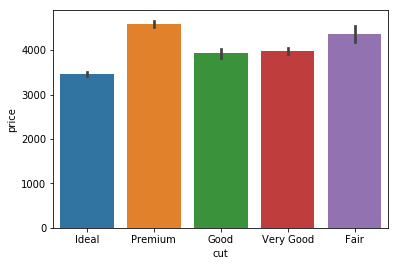

In [12]:
# Plotting data
sns.barplot(x = 'cut', y = 'price', data = dataset)

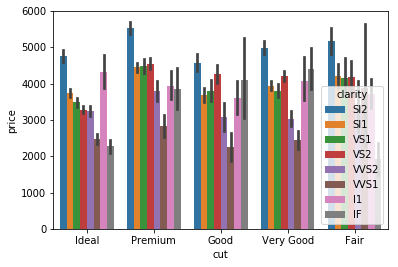

In [13]:
sns.barplot(x = 'cut', y = 'price', hue = 'clarity', data = dataset)

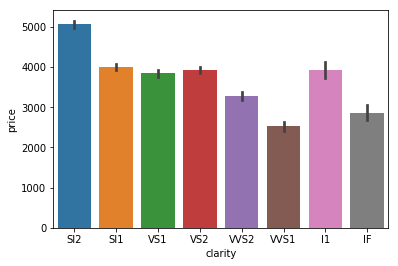

In [14]:
sns.barplot(x = 'clarity', y = 'price', data = dataset)

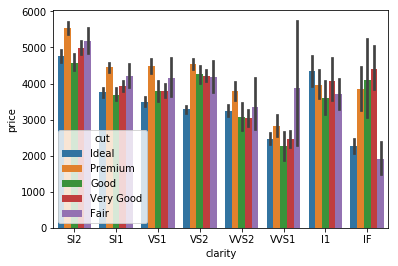

In [15]:
sns.barplot(x = 'clarity', y = 'price', hue = 'cut', data = dataset)

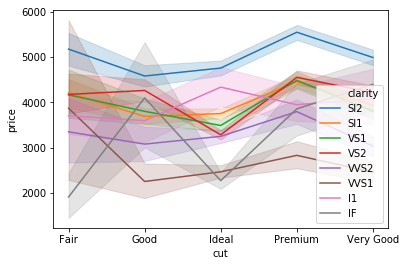

In [16]:
sns.lineplot(x = 'cut', y = 'price', hue = 'clarity', data = dataset)

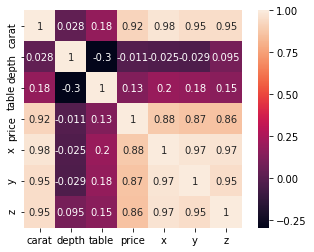

In [17]:
corr = dataset.corr()
sns.heatmap(data = corr, square = True, annot = True, cbar = True)

We see that -
* price is highy correlated with carat, x, y and z dimensions
* inversly correlated with depth

In [18]:
# Using labelencoder to encode data to numeric values
le = LabelEncoder()
columns = ['cut', 'clarity', 'color']
for col in columns:
    dataset[col] = le.fit_transform(dataset[col])

In [19]:
# Checking if the above code worked
dataset.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
6,0.24,4,5,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,4,4,2,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,1,5,65.1,61.0,337,3.87,3.78,2.49
9,0.23,4,4,4,59.4,61.0,338,4.00,4.05,2.39


**Feature engineering**

In [20]:
# Making a new feature 'volume' and dropping columns x, y and z
dataset['volume'] = dataset['x'] * dataset['y'] * dataset['z']
dataset.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [21]:
# Dropping x, y and z columns
dataset.drop(['x', 'y', 'z'], axis = 1, inplace = True)
dataset.head(5)

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


In [22]:
# Removing rows with volume = 0 which is absurd
dataset = dataset[dataset['volume'] != 0]
dataset[dataset['volume'] == 0].count()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
volume     0
dtype: int64

In [23]:
# Splitting train and test data
X = dataset.drop(['price'], axis = 1)
Y = dataset['price']

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
models = [('LinearRegression', LinearRegression()),
          ('Ridge', Ridge(normalize = True)),
          ('Lasso', Lasso(normalize = True)),
          ('RidgeCV', RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])),
          ('ElasticNet', ElasticNet(random_state = 1)),
          ('RandomForestRegressor', RandomForestRegressor(max_depth=2, random_state=1, n_estimators=100)),
          ('BaggingRegressor', BaggingRegressor()),
          ('GradientBoostingRegressor', GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1,max_depth = 1, random_state = 1)),
          ('AdaBoostRegressor', AdaBoostRegressor(n_estimators = 1000)),
          ('KNeighborsRegressor', KNeighborsRegressor())
         ]

for name, model in models:
    model.fit(train_x, train_y)
    pred = model.predict(test_x)
    print(name, model.score(test_x, test_y))

LinearRegression 0.8795669882465413
Ridge 0.7542764353774858
Lasso 0.8637782836229753
RidgeCV 0.8795664142420615
ElasticNet 0.860464832704824
